In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


def clustering_process(
    df: pd.DataFrame,
    cluster_method: type[DBSCAN | KMeans],
    scaler_method: type[StandardScaler],
    main_data_columns: list[str] = ["price", "squareMeters", "cityCode"], 
    additional_data_columns: list[str] = ["id"],
    cluster_setup: dict[str, str] = {},
    scaler_setup: dict[str, str] = {}
) -> pd.DataFrame: 
    scaler = scaler_method(**scaler_setup)
    nums = df.loc[:, main_data_columns]
    ids = df.loc[:, additional_data_columns]
    norm_nums = scaler.fit_transform(nums)
    norm = np.column_stack((ids, norm_nums))

    dbscan = cluster_method(**cluster_setup)
    clusters = dbscan.fit_predict(norm_nums)

    processed_df = pd.DataFrame(
        columns=additional_data_columns + main_data_columns + ["cluster_id"])
    i = 0
    for cluster_id in np.unique(clusters):
        cluster_mask = (clusters == cluster_id)
        cluster_data = norm[cluster_mask]
        for data in cluster_data:
            processed_df.loc[i] = list(data) + [cluster_id]
            i += 1

    return processed_df


def cluster_visualize(
    df: pd.DataFrame, 
    x_column: str = "price", 
    y_column: str = "squareMeters", 
    figsize: tuple[int, int] = (10, 10),
    xlabel = "Розмір у м^2",
    ylabel = "Ціна у $",
    title = "Порівняння нерухомості ціна/розмір"
):
    fig, ax = plt.subplots(figsize=figsize)

    for cluster_id in df["cluster_id"].unique():
        cluster_df = df[df["cluster_id"] == cluster_id]
        sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")
        sct.set_label(f"Cluster: {cluster_id}")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.set_cmap('coolwarm')
    fig.legend(ncols=5)
    
    return fig, ax

In [2]:
train_df = pd.read_csv("datasets/paris_housing_price/train.csv")
test_df = pd.read_csv("datasets/paris_housing_price/test.csv")

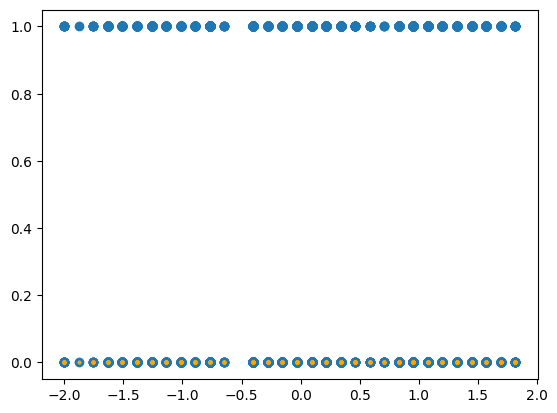

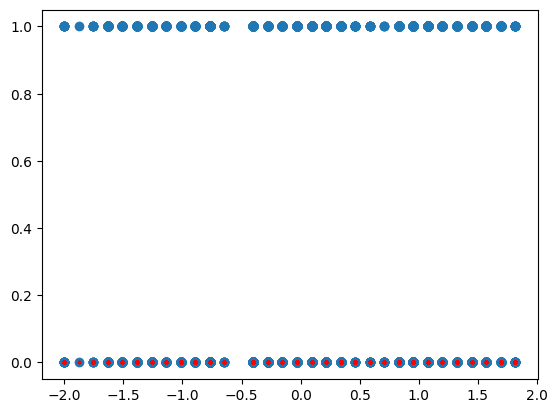

In [3]:
from datetime import datetime

sorted_df = train_df.sort_values("made")
filtered_df = sorted_df[sorted_df["made"] < datetime.now().year][["made", "price", "isNewBuilt"]]

scaler = StandardScaler()
norm = scaler.fit_transform(filtered_df[["made", "price"]])

X = norm
y = filtered_df["isNewBuilt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)


lm1 = LogisticRegression(penalty="l1", solver="saga")
lm1 = lm1.fit(X_train, y_train)

lm2 = LogisticRegression(penalty="l2", solver="saga")
lm2 = lm2.fit(X_train, y_train)

predicts1 = lm1.predict(X_test)
predicts2 = lm2.predict(X_test)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts1, s=3, color="orange")
plt.show()

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts2, s=3, color="red")
plt.show()


In [4]:
print("Lasso")
print(accuracy_score(y_test, predicts1))
print(confusion_matrix(y_test, predicts1))

print("\nRidge")
print(accuracy_score(y_test, predicts2))
print(confusion_matrix(y_test, predicts2))

for p1, p2, t in zip(predicts1, predicts2, y_test):
    print(p1, p2, t)

Lasso
0.5273927392739274
[[2397    0]
 [2148    0]]

Ridge
0.5273927392739274
[[2397    0]
 [2148    0]]
0 0 0
0 0 0
0 0 1
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 1
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 1
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 1
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0 0 0
0 0 1
0 0 0
0 0 1
0 0 0
0

In [42]:
housing_train_df = pd.read_csv("datasets/housing_price/train.csv", encoding="windows-1252")

filtered_df = housing_train_df

for column in filtered_df.columns:
    try:
        filtered_df[column].astype(float)
    except:
        filtered_df[column] = filtered_df[column].astype("category").cat.codes

filtered_df["isGarageCars"] = False
filtered_df["isGarageCars"] = filtered_df[filtered_df["GarageCars"] > 2]["isGarageCars"].fillna(True)
filtered_df["isGarageCars"] = filtered_df["isGarageCars"].astype(bool)

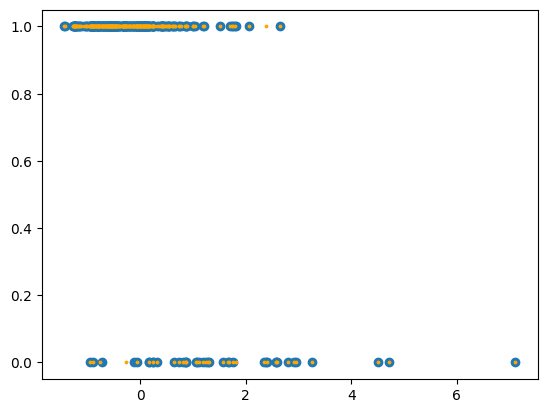

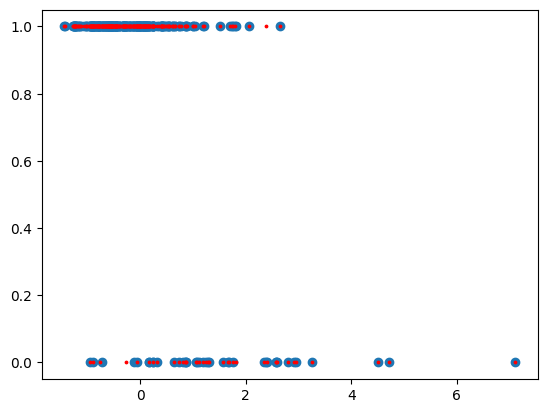

Lasso
0.9657534246575342
[[ 34   6]
 [  4 248]]

Ridge
0.9657534246575342
[[ 34   6]
 [  4 248]]


In [43]:
scaler = StandardScaler()
norm = scaler.fit_transform(filtered_df[["SalePrice", "GarageArea"]])

X = norm
y = filtered_df["isGarageCars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lm1 = LogisticRegression(penalty="l1", solver="saga")
lm1 = lm1.fit(X_train, y_train)

lm2 = LogisticRegression(penalty="l2", solver="saga")
lm2 = lm2.fit(X_train, y_train)

predicts1 = lm1.predict(X_test)
predicts2 = lm2.predict(X_test)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts1, s=3, color="orange")
plt.show()

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts2, s=3, color="red")
plt.show()

print("Lasso")
print(accuracy_score(y_test, predicts1))
print(confusion_matrix(y_test, predicts1))

print("\nRidge")
print(accuracy_score(y_test, predicts2))
print(confusion_matrix(y_test, predicts2))

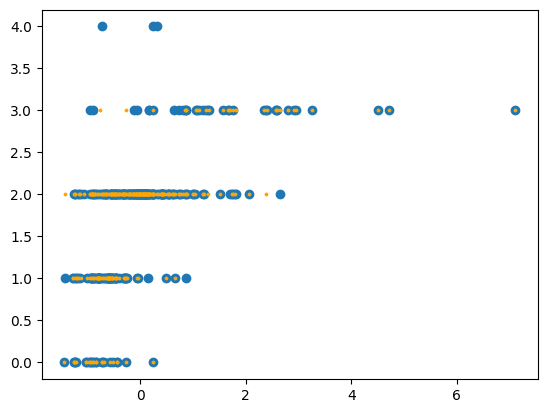

0.8698630136986302
[[ 23   0   0   0   0]
 [  0  55  14   1   0]
 [  0   3 152   4   0]
 [  0   0  13  24   0]
 [  0   0   2   1   0]]


In [44]:
scaler = StandardScaler()
norm = scaler.fit_transform(filtered_df[["SalePrice", "GarageArea", "GarageQual"]])

X = norm
y = filtered_df["GarageCars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

odm = LogisticRegression(multi_class="ovr")
odm = odm.fit(X_train, y_train)

predicts = odm.predict(X_test)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts, s=3, color="orange")
plt.show()

print(accuracy_score(y_test, predicts))
print(confusion_matrix(y_test, predicts))

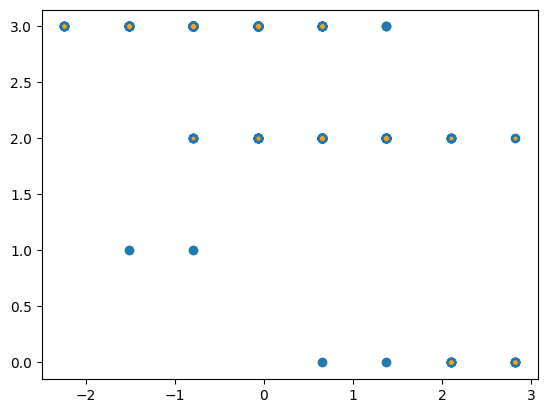

0.8801369863013698
[[ 10   0   3   0]
 [  0   0   0   2]
 [  5   0  80  15]
 [  0   0  10 167]]


In [47]:
scaler = StandardScaler()
norm = scaler.fit_transform(filtered_df[["OverallQual", "KitchenQual"]])

X = norm
y = filtered_df["ExterQual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

odm = LogisticRegression(multi_class="multinomial")
odm = odm.fit(X_train, y_train)

predicts = odm.predict(X_test)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicts, s=3, color="orange")
plt.show()

print(accuracy_score(y_test, predicts))
print(confusion_matrix(y_test, predicts))